In [5]:
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate synthetic classification data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                            n_redundant=0, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Linear Kernel
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train, y_train)
linear_predictions = linear_svc.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_predictions)
print("Linear Kernel Accuracy:", linear_accuracy) 
#polynomial kernel 

poly_svc = svm.SVC(kernel = 'poly' , degree = 3)#degree = x**0+ x**1+ x**2 = 3
poly_svc.fit(X_train,y_train)
poly_predictions = poly_svc.predict(X_test)
poly_accuracy = accuracy_score(y_test , poly_predictions)
print('polynomial kernel accuracy:', poly_accuracy)

Linear Kernel Accuracy: 1.0
polynomial kernel accuracy: 0.9


In [6]:
import pandas as pd 
import numpy as np

# USER PURCHASE PREDICTION

In [11]:
df = pd.read_csv("C:\\Users\\DELL\\Documents\\user-data.csv")

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [13]:
display(df.head(2))
display(df.dtypes)

,user_id,gender,age,estimated_salary,purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


user_id              int64
gender              object
age                  int64
estimated_salary     int64
purchased            int64
dtype: object

In [15]:
lb = LabelEncoder()

In [16]:
df['gender'] = lb.fit_transform(df['gender'])

In [20]:
# Extracting independent and dependent variables.
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

# Output first five values in both the lists.
print(x[:5])
print(y[:5])

# Independent variables are age and estimated_salary.
# Dependent variable is purchased because it depends on a person's age as well as his/her estimated salary

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]
[0 0 0 0 0]


In [21]:
# Splitting the data into training and testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=11)

In [22]:
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)

print("x_train:", x_train[:5], " ... ")
print("")
print("x_test:", x_test[:5], " ... ")

x_train: [[ 0.03336096  1.14841214]
 [-1.20576028  0.22914619]
 [-1.68234538 -0.6613927 ]
 [ 0.98653114  1.9814969 ]
 [-0.82449221  0.31532737]]  ... 

x_test: [[ 0.03336096 -0.02939736]
 [ 1.84438431 -1.3221151 ]
 [-0.44322414 -0.08685148]
 [ 2.13033536 -0.86248212]
 [-1.68234538  0.28660031]]  ... 


In [23]:
model = SVC(kernel = 'linear' , random_state = 11)
model.fit(x_train , y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [24]:
# Predicting the testing dataset results
y_pred = model.predict(x_test)
print(y_pred[:10], " ... ")

[0 1 0 1 0 0 0 0 0 1]  ... 


In [26]:
df = pd.DataFrame(y_test , y_pred)
df.head()

,0
0,0
1,1
0,0
1,1
0,0


[[63  3]
 [15 19]]


<Axes: >

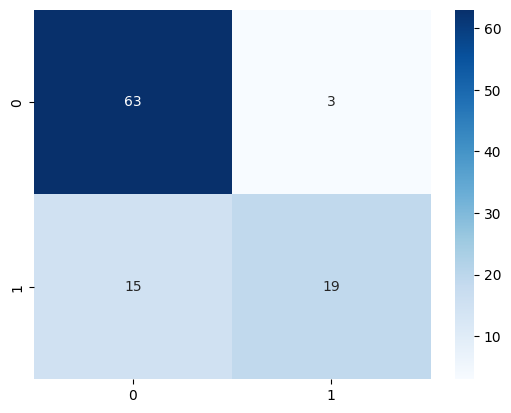

In [27]:
#creating the confusion matrix and heatmap
cm = confusion_matrix(y_test , y_pred)
print(cm)
sns.heatmap(cm , annot = True , cmap ='Blues')

In [29]:
acc= accuracy_score(y_test , y_pred)
print('Accuracy:',acc)

Accuracy: 0.82


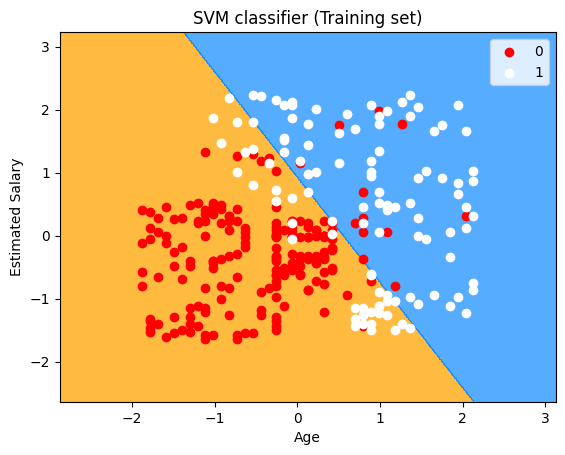

In [32]:

x_set, y_set = x_train, y_train

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01), np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, model.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, cmap = ListedColormap(('orange', 'dodgerblue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j , 0],x_set[y_set == j , 1] , c = [ListedColormap(('red','white'))(i)], label =j)

plt.title('SVM classifier (Training set)')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')

plt.legend()

plt.show()